In [ ]:
import numpy as np


fs = 256
t = np.arange(0, 2, 1/fs)

def generate_signal(label):
    alpha = 50 * np.sin(2 * np.pi * 10 * t)
    beta = 30 * np.sin(2 * np.pi * 20 * t)
    noise = 10 * np.random.randn(len(t))
    
    if label == 0: 
        return alpha + noise
    else:           
        return beta + noise

signals = []
labels = []

for _ in range(100):
    signals.append(generate_signal(0))
    labels.append(0)
    
for _ in range(100):
    signals.append(generate_signal(1))
    labels.append(1)

signals = np.array(signals)
labels = np.array(labels)

In [3]:
from scipy.fft import fft

def extract_features(signal):
    yf = np.abs(fft(signal))
    freqs = np.fft.fftfreq(len(signal), 1/fs)
    
    alpha_band = (freqs >= 8) & (freqs <= 12)
    beta_band = (freqs >= 13) & (freqs <= 30)
    
    alpha_power = np.sum(yf[alpha_band])
    beta_power = np.sum(yf[beta_band])
    
    return [alpha_power, beta_power]

features = np.array([extract_features(sig) for sig in signals])

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


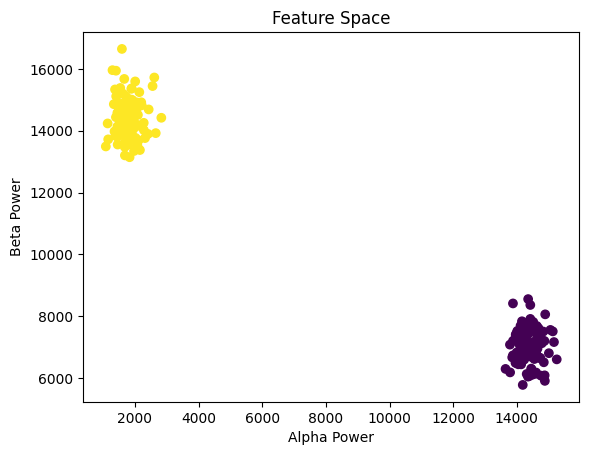

In [6]:
import matplotlib.pyplot as plt

plt.scatter(features[:,0], features[:,1], c=labels)
plt.xlabel("Alpha Power")
plt.ylabel("Beta Power")
plt.title("Feature Space")
plt.show()